# **Distribution of Network Analysis  for Electric Vehicles(EV'S)**

EVCharge Utilities is a prominent electric utility provider.The company's Primary mission is to ensure reliabl delivery of electrical power to millions of customers.

The company has witnessed a significant Transformation in adoption of EV's as part of global efforts to reduce Carbon emissions and climate change

##PROBLEM IN ADOPTION OF EV'S##

EVCharge Utilites encounters several critical challenges due to growing adoption of EV'S

----**Increase Load Demand** ----

Widespread EV adoption has caused a significant spike in electricity demand,This Strains the existing distribution of network

---**Grid overload**---

Frequent overloads in distribution network leads to voltage fluctuations
 and outages in some areas,affecting Grid reliability

 ----**Customer Satisfaction**----

 Ev Owners except rliable and convenient charging services .Ensuring this level of service is essential to maintain customer satisfaction.

 ---**Cost Management**---

 Balancing increased load demand.Company must optimize network to manage epense effectively.

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [6]:
Distribution_Data = pd.read_csv('ev_distribution_dataset.csv')
Geospatial_Data = pd.read_csv('geospatial_dataset.csv')
Weather_Data = pd.read_csv('weather_dataset.csv')

In [7]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [8]:
Geospatial_Data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [9]:
Weather_Data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


Understanding Structure of datasets

In [10]:
# Check data types and missing values
print("Data Types and Missing Values:")
Distribution_Data.info()

# Decription of numerical columns
Distribution_Data.describe()


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


***Exploratory Data Analysis***

**univariate Analysis**

1.visualize the distribution of elctricity consumption

2.Analyze the ev types,customer type, charging habits

**BiVariate Analysis**

1.use geospitial_data to visualize locations of substations and EV charging stations.

2.Analyze capacity of transmission lines

#UNIVARIATE ANALYSIS#

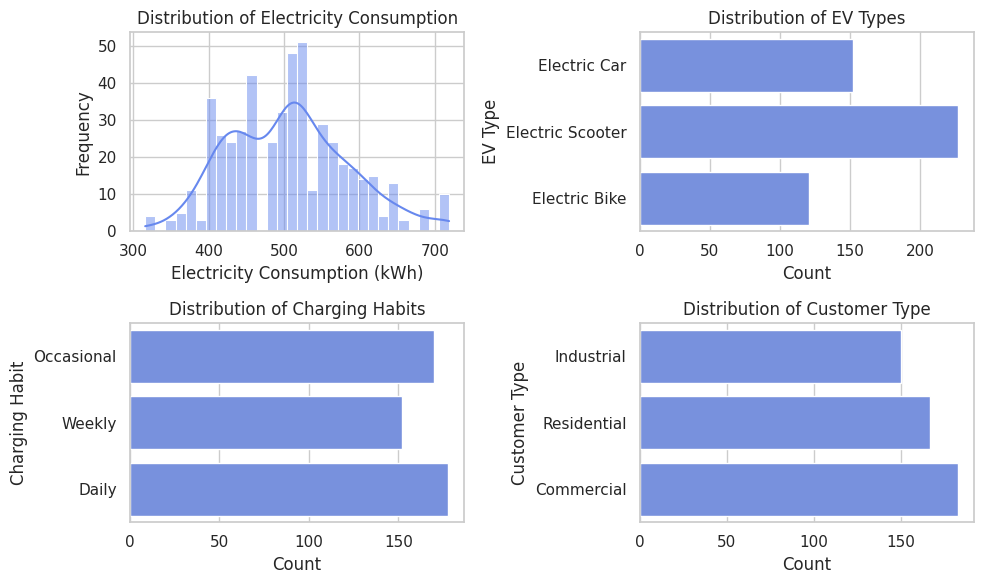

In [11]:
# Set the style and color palette of the plots
sns.set(style="whitegrid")
sns.set_palette("coolwarm")

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot the distribution of electricity consumption
sns.histplot(data=Distribution_Data, x="Electricity_Consumption (kWh)", bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Electricity Consumption")
axes[0, 0].set_xlabel("Electricity Consumption (kWh)")
axes[0, 0].set_ylabel("Frequency")

# Plot the distribution of EV types
sns.countplot(data=Distribution_Data, y="EV_Type", ax=axes[0, 1])
axes[0, 1].set_title("Distribution of EV Types")
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("EV Type")

# Plot the distribution of Charging Habits
sns.countplot(data=Distribution_Data, y="Charging_Habit", ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Charging Habits")
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Charging Habit")

# Plot the distribution of Customer Type
sns.countplot(data=Distribution_Data, y="Customer_Type", ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Customer Type")
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Customer Type")

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

OBSERVATIONS

1.Electricity consumption mostly centred around 500 kwh,with some instances of higher consumption

2.Electric scooters ar most commontypes of EV and electric bikes are least

3.Most Customers charges daily,least is weekly

4.Most Customers are Commercial customers,last ar industrial

##BIVARIATE ANALYSIS##

In [12]:
# Extract latitude and longitude for EV charging stations
Distribution_Data['ev_latitude'] = Distribution_Data['EV_Charging_Station_Location'].apply(
    lambda x: float(x.split(",")[0].replace("(", "").strip()))
Distribution_Data['ev_longitude'] = Distribution_Data['EV_Charging_Station_Location'].apply(
    lambda x: float(x.split(",")[1].replace(")", "").strip()))

# Extract latitude and longitude for substations
Geospatial_Data['substation_latitude'] = Geospatial_Data['Substation_Location'].apply(
    lambda x: float(x.split(",")[0].replace("(", "").strip()))
Geospatial_Data['substation_longitude'] = Geospatial_Data['Substation_Location'].apply(
    lambda x: float(x.split(",")[1].replace(")", "").strip()))

# Drop the original location columns to clean up the dataframe
Distribution_Data = Distribution_Data.drop(columns=['EV_Charging_Station_Location'])
Geospatial_Data = Geospatial_Data.drop(columns=['Substation_Location'])

In [13]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [14]:
Geospatial_Data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


<ipython-input-15-60da2d150350>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


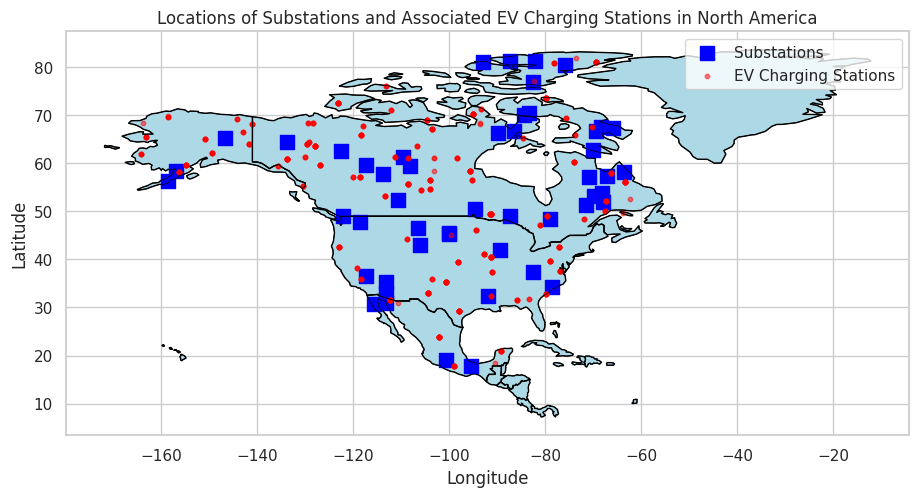

In [15]:
# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(Distribution_Data,
                          geometry=gpd.points_from_xy(Distribution_Data.ev_longitude, Distribution_Data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_Data,
                                  geometry=gpd.points_from_xy(Geospatial_Data.substation_longitude, Geospatial_Data.substation_latitude))

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map data to include only North America
north_america = world[world['continent'] == "North America"]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')
# Plotting the EV charging stations on the map
ev_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Set title and axis labels
plt.title('Locations of Substations and Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-20-bdcb1394d092>:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


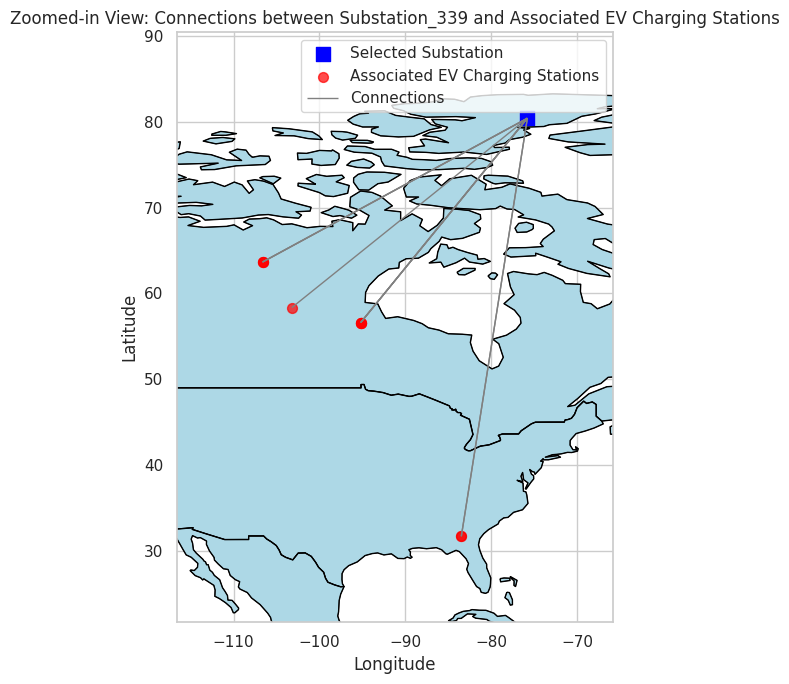

In [20]:
#Let's zoom in and see the connection of substation 3 to EV charging station
from shapely.geometry import LineString

# Filtering for the third substation and its associated EV charging stations
selected_substation = Geospatial_Data.iloc[2]
associated_ev = Distribution_Data[Distribution_Data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert the dataframes to GeoDataFrames using the provided latitude and longitude columns
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), geometry=gpd.points_from_xy([selected_substation.substation_longitude], [selected_substation.substation_latitude]))

# Create lines connecting the selected substation to its associated EV charging stations
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['substation_longitude'], selected_substation['substation_latitude']) for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Define the north_america variable
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == "North America"]

# Determining the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting with zoom
fig, ax = plt.subplots(figsize=(13, 7))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Selected Substation')
ev_gdf_selected.plot(ax=ax, markersize=50, color='red', label='Associated EV Charging Stations', alpha=0.7)
line_gdf_selected.plot(ax=ax, linewidth=1, color='gray', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title(f'Zoomed-in View: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


OBSERVATION

EV Charging station is far from it's substation, this could be contributing factoringg to some grid Overload

##NETWORK CAPACITY##

Calculate the total electricity Consumption and compare with Transmission line Capacity

In [18]:
# Grouping the EV distribution data by Substation_ID and calculating total electricity consumption for each substation
total_consumption_per_substation = Distribution_Data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

# Merging the total consumption data with the geospatial data
network_capacity_data = pd.merge(Geospatial_Data, total_consumption_per_substation, on='Substation_ID')

# Renaming columns for better understanding
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total_Consumption (kWh)'}, inplace=True)

# Calculating the ratio of total consumption to transmission line capacity
# Conversion: 1 MW = 1000 kWh
network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)




In [21]:
network_capacity_data

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546
5,Substation_752,33,81.295968,-87.304226,5935.678393,0.179869
6,Substation_294,35,52.421521,-110.699042,4010.395180,0.114583
7,Substation_301,20,30.873564,-113.079468,4738.530994,0.236927
8,Substation_443,60,62.832107,-70.090111,5673.039047,0.094551
9,Substation_996,65,81.330310,-82.055755,4941.446087,0.076022


##CORRELATION RATIO##

In [22]:

total_consumption_per_substation = Distribution_Data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()


ev_counts = Distribution_Data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()


network_capacity_data = pd.merge(Geospatial_Data, total_consumption_per_substation, on='Substation_ID')
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total_Consumption (kWh)'}, inplace=True)
network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)


final_data = pd.merge(ev_counts, network_capacity_data, on='Substation_ID')


correlation_ratio = final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])

correlation_ratio

-0.10944923035990646

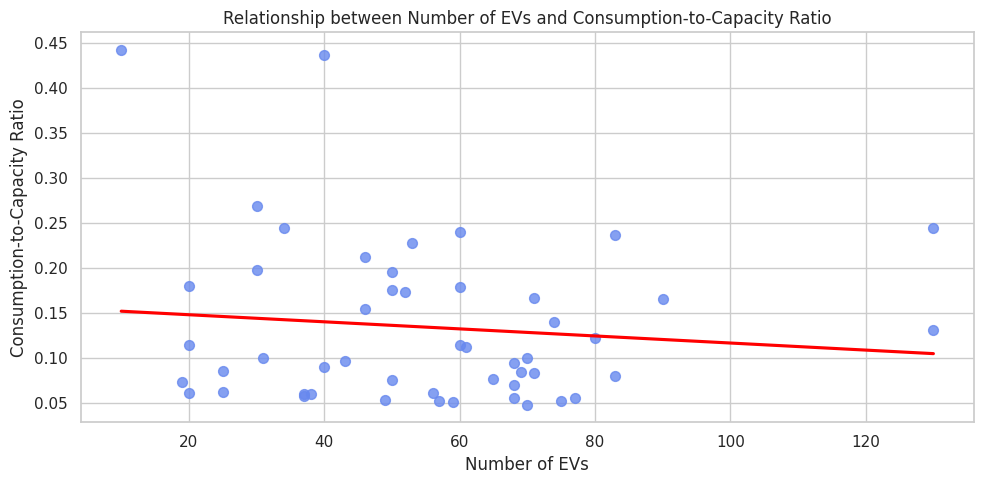

In [23]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Number_of_EVs', y='Consumption_to_Capacity_Ratio', data=final_data, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)
plt.title('Relationship between Number of EVs and Consumption-to-Capacity Ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption-to-Capacity Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

OBSERVATIONS:

The Map above shows Consumption_to_Capacity_Ratio for each Substation

* substations in red,have higher consumption capacity ratio,indicating potential overloads in network

*  substations in blue,have lower consumption capacity ratio,indicating network capacity is sufficient for load.

* The Correlation between EV's to overload is weak.so it can't uantified as teh reasons for overload.


## OPTIMIZING NETWORK Upgrades ##

Upgrading transmission_lines/additional capacity in these areas can help in managing the increase load and grid reliability.

--Geographical distributions of EV Charging stations because EV Stations are far from Substations.

In [24]:
top_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')[['Substation_ID', 'Consumption_to_Capacity_Ratio', 'Total_Consumption (kWh)', 'Transmission_Line_Capacity (MW)']]

top_substations

,Substation_ID,Consumption_to_Capacity_Ratio,Total_Consumption (kWh),Transmission_Line_Capacity (MW)
3,Substation_773,0.442634,4426.337993,10
14,Substation_87,0.436983,5243.800714,12
27,Substation_711,0.269374,4579.354677,17
20,Substation_11,0.244996,10534.827701,43
42,Substation_258,0.244464,5378.214378,22


#Correlation with Weather Data#

Analying correlation between Weather data and electricity consumption can provide insights into how weather affects distribution network.

In [25]:
merged_data = pd.merge(Distribution_Data, Weather_Data, on=['Timestamp', 'Substation_ID'])

# Calculating the correlation between weather conditions and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

# Displaying the correlation matrix
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


##OBSERVATIONS##



The Correlation matrix shows the coefficients between Electricity,temperature and Preceptation are weak.

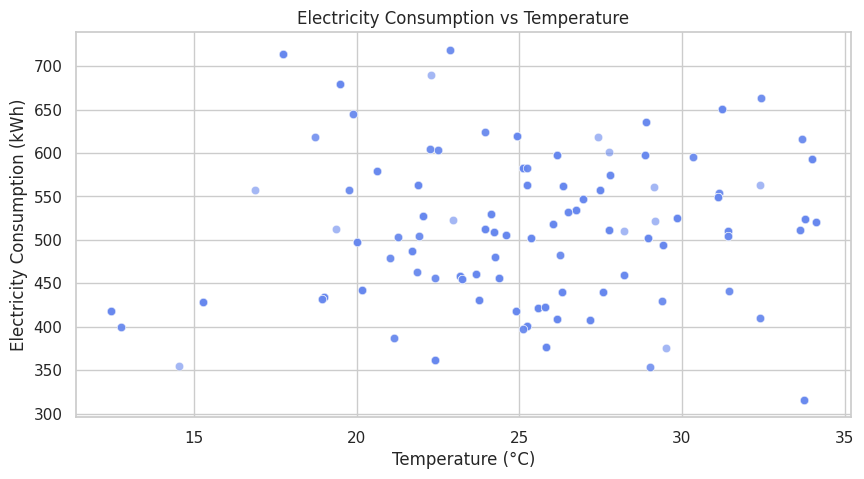

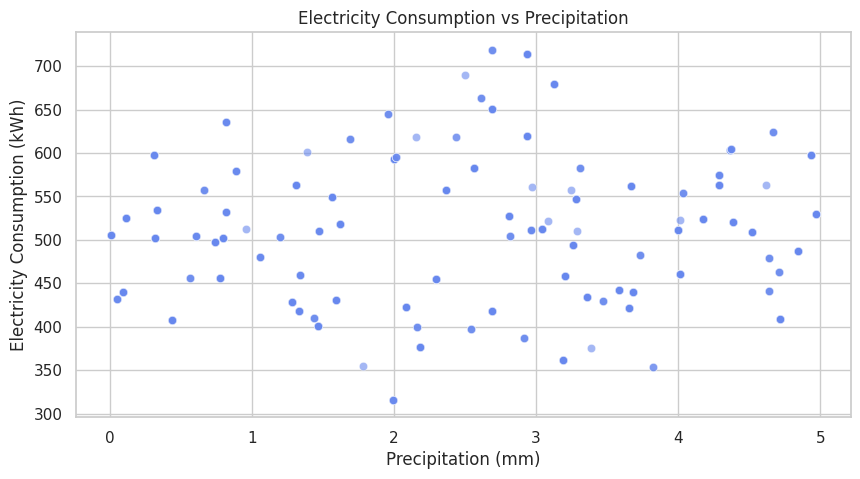

In [29]:
# Electricity Consumption vs Temperature
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x="Temperature (°C)", y="Electricity_Consumption (kWh)", alpha=0.6)
plt.title("Electricity Consumption vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Electricity Consumption (kWh)")
plt.show()

# Electricity Consumption vs Precipitation
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x="Precipitation (mm)", y="Electricity_Consumption (kWh)", alpha=0.6)
plt.title("Electricity Consumption vs Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Electricity Consumption (kWh)")
plt.show()

##OBSERVATIONS##

Based on dataset,weather conditions have weak correlation with electricity consumption in distribution.others factors are more influential in affecting electricity consumption.


Its important to consider weather data because etreme weather conditions can impact on distribution network.

### The Optimization Strategy/Recommendation

#### This is based on the analysis done and the business problems at hand, all these should be incorporated into the business.

1. **Prioritize Substation Upgrades:**
    Prioritize upgrades at substations where the `Consumption_to_Capacity_Ratio` is high, indicating potential overloads. Upgrade the transmission lines because the subsataions are too far from their corresponding Substations.


2. **Geospatial Analysis for Upgrade Planning:**
    Use geospatial analysis to determine the optimal locations for new substations or upgrades to existing ones. Consider factors like the proximity to high load demand areas (areas with high consumption to capcity ratio) and geographical constraints.


3. **Demand Side Management:**
   Implement demand-side management strategies to balance the load on the grid. Encourage customers to charge their EVs during off-peak hours through incentives or dynamic pricing.


4. **Advanced Monitoring and Analytics:**
   Deploy advanced monitoring systems to continuously monitor the health and performance of the distribution network. Use analytics to predict potential issues and take preventive action.


5. **Cost-Benefit Analysis:**
   Conduct a comprehensive cost-benefit analysis for different upgrade options. Consider factors like the cost of upgrades, operational costs, potential revenue from increased capacity, and the impact on service reliability and customer satisfaction.


6. **Customer Engagement:**
   Engage with customers to understand their needs and expectations. Provide clear communication about network upgrades and how they will enhance service reliability and meet the growing demand for EV charging.


7. **Continuous Improvement:**
  Continuously monitor and assess the performance of the distribution network. Gather feedback from customers and other stakeholders, and use this feedback to make further improvements and optimizations.


By following these steps, PowerCharge Utilities can develop an effective optimization strategy to manage the increased load demand from EV charging stations, ensure the reliability and resilience of the distribution network, and meet the expectations of customers, all while optimizing costs and ensuring regulatory compliance.